In [24]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt

# Reading the audio

In [48]:
y, sr = librosa.load('./labeled_recs_sample/W52753S23867_20200124_081000.wav')
y -= np.mean(y)
y /= np.std(y)

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10, n_fft=2048, hop_length=512)
mel = np.log10(librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)) * 10
bounds = librosa.segment.agglomerative(mel, 10)
bound_times = librosa.frames_to_time(bounds, sr=sr, n_fft=2048, hop_length=512)

bound_times

array([4.64399093e-02, 1.09133787e+00, 6.01396825e+00, 1.65558277e+01,
       2.25001361e+01, 3.33670748e+01, 3.62927891e+01, 4.05884807e+01,
       4.06813605e+01, 4.80188662e+01])

# Applying Noise Profiling

In [111]:
frequency_means = np.sum(mel, axis=0)

for offset in range(8):
  frequency_means_chunk = frequency_means[323*offset:323*(offset+1):]

  # Getting the means of the frequencies
  for i in range(len(frequency_means_chunk+1)):
    frequency_means_chunk[i] = frequency_means_chunk[i]/323

  print(frequency_means_chunk)

  for i in range(len(mel)):
    for j in range(len(mel[i])):
      mel[i][j] -= frequency_means[i]


mel

[413382.7  413383.5  413383.7  413383.38 413383.44 413383.6  413383.53
 413383.8  413384.06 413383.84 413383.72 413383.84 413383.84 413383.78
 413383.97 413384.28 413384.3  413384.34 413384.3  413384.25 413384.1
 413384.1  413384.06 413383.97 413383.88 413383.94 413384.2  413384.2
 413384.06 413384.3  413384.3  413384.22 413384.12 413383.97 413383.94
 413383.78 413384.   413384.3  413384.66 413384.5  413384.78 413384.84
 413384.4  413384.2  413384.06 413383.75 413383.88 413383.8  413383.94
 413383.78 413383.75 413383.84 413383.53 413383.7  413383.56 413383.56
 413383.56 413383.7  413383.56 413383.66 413383.7  413383.7  413383.53
 413383.75 413384.12 413384.03 413383.8  413383.75 413383.7  413383.72
 413383.88 413384.16 413384.   413383.94 413383.97 413383.88 413384.
 413384.   413383.8  413383.66 413383.8  413383.88 413384.03 413383.9
 413383.8  413383.72 413383.75 413383.78 413383.94 413383.97 413384.
 413383.94 413383.94 413383.7  413383.72 413383.9  413383.97 413384.
 413384.03 4133

array([[-2263065.8, -2263064.8, -2263060.8, ..., -2263065. , -2263069. ,
        -2263065.8],
       [-2263675. , -2263667. , -2263663.5, ..., -2263672.8, -2263673. ,
        -2263674.8],
       [-2263666. , -2263652.8, -2263649.5, ..., -2263651. , -2263651. ,
        -2263655. ],
       ...,
       [-2263995.8, -2264000.5, -2264006. , ..., -2264005.5, -2264004.8,
        -2264003.5],
       [-2264051. , -2264057. , -2264072.5, ..., -2264068. , -2264067.5,
        -2264066. ],
       [-2263955.5, -2263961.5, -2263994. , ..., -2263990.8, -2263989.2,
        -2263979. ]], dtype=float32)

[Text(0.5, 1.0, 'Power Spectrogram')]

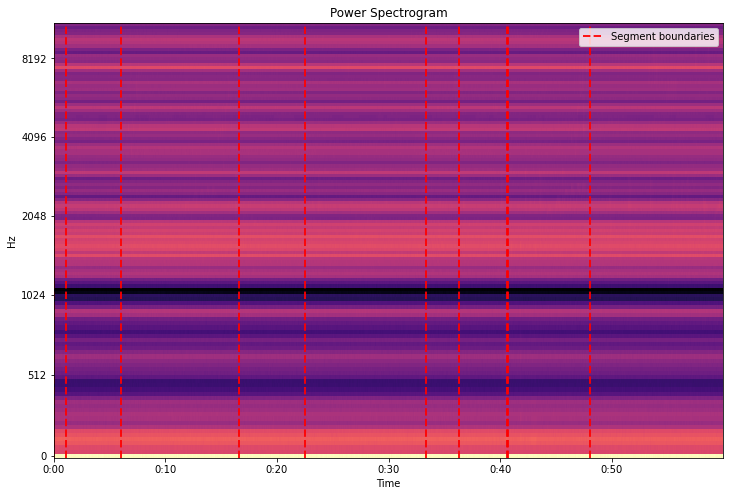

In [112]:
fig, ax = plt.subplots(figsize=(12, 8))
trans = mpt.blended_transform_factory(ax.transData, ax.transAxes)
librosa.display.specshow(mel, y_axis='mel', x_axis='time', ax=ax, n_fft=2048, hop_length=512, sr=sr)
ax.vlines(bound_times,
          0, 
          1,
          color='red',
          linestyle='--',
          linewidth=2,
          alpha=0.9,
          label='Segment boundaries',
          transform=trans,
         )
ax.legend()
ax.set(title='Power Spectrogram')